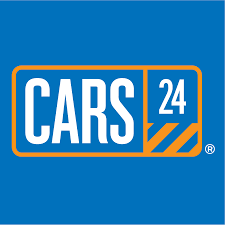

#**Project Title :** Web scraping of cars24 website.

#**About Project**

**The capacity to gather and use data from internet sources is essential in a website where decisions are made based on data. This project uses BeautifulSoup, an advanced web scraping tool, to explore the dynamic Cars24 universe. I've found information about used automobiles in the Mumbai area by traversing the complex HTML framework of the website. This information includes car models, prices, fuel kinds, characteristics, and more. This study not only demonstrates online scraping methods but also emphasizes how crucial accuracy and data integrity are when collecting digital information. only TATA, Maruti, and Hyundai companies are grabbed here.**

**Import Libraries:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import regex as re
import re
from bs4 import BeautifulSoup

In [ ]:
# Identify the URL

url  = "https://www.cars24.com/buy-used-car?f=make%3A%3D%3Atata%3AOR%3Amake%3A%3D%3Amaruti%3AOR%3Amake%3A%3D%3Ahyundai&sort=P&serveWarrantyCount=true&gaId=897092325.1722682594&listingSource=TabFilter&storeCityId=2378"

In [ ]:
# Loading the WebPage in Memory using requests library

page = requests.get(url)

In [ ]:
# Check the Status Code of the Page

page.status_code

200

In [ ]:
# Extracting the HTML Code of the WebPage

htmlCode = page.text

htmlCode

'<!DOCTYPE html>\n\n<html lang="en-IN">\n\n<head>\n    <link rel="preconnect" href="https://assets.cars24.com">\n    <link rel="preconnect" href="https://fastly-production.24c.in">\n    <link rel="preconnect" href="https://connect.facebook.net">\n    <link rel="preconnect" href="https://www.googletagmanager.com">\n    <link rel="preconnect" href="https://www.google-analytics.com">\n    <link rel="preconnect" href="https://analytics.twitter.com">\n    <link rel="preconnect" href="https://www.facebook.com">\n    <link rel="preconnect" href="https://www.google.com">\n    <link rel="preconnect" href="https://www.google.co.in">\n    <link rel="preconnect" href="https://googleads.g.doubleclick.net">\n    <link rel="preconnect" href="https://t.co">\n    <link rel="preconnect" href="https://static.ads-twitter.com">\n    <link rel="preconnect" href="https://tracking.cars24.com">\n    <link rel="preconnect" href="https://www.googleoptimize.com">\n    <link rel="preconnect" href="https://web-sdk.

In [ ]:
# Format the HTML code using bs4 library

soup = BeautifulSoup(htmlCode,'lxml')

print(soup.prettify())

<!DOCTYPE html>
<html lang="en-IN">
 <head>
  <link href="https://assets.cars24.com" rel="preconnect"/>
  <link href="https://fastly-production.24c.in" rel="preconnect"/>
  <link href="https://connect.facebook.net" rel="preconnect"/>
  <link href="https://www.googletagmanager.com" rel="preconnect"/>
  <link href="https://www.google-analytics.com" rel="preconnect"/>
  <link href="https://analytics.twitter.com" rel="preconnect"/>
  <link href="https://www.facebook.com" rel="preconnect"/>
  <link href="https://www.google.com" rel="preconnect"/>
  <link href="https://www.google.co.in" rel="preconnect"/>
  <link href="https://googleads.g.doubleclick.net" rel="preconnect"/>
  <link href="https://t.co" rel="preconnect"/>
  <link href="https://static.ads-twitter.com" rel="preconnect"/>
  <link href="https://tracking.cars24.com" rel="preconnect"/>
  <link href="https://www.googleoptimize.com" rel="preconnect"/>
  <link href="https://web-sdk.smartlook.com" rel="preconnect"/>
  <meta charset="utf

In [ ]:
help(soup)

Help on BeautifulSoup in module bs4 object:

class BeautifulSoup(bs4.element.Tag)
 |  BeautifulSoup(markup='', features=None, builder=None, parse_only=None, from_encoding=None, exclude_encodings=None, element_classes=None, **kwargs)
 |  
 |  A data structure representing a parsed HTML or XML document.
 |  
 |  Most of the methods you'll call on a BeautifulSoup object are inherited from
 |  PageElement or Tag.
 |  
 |  Internally, this class defines the basic interface called by the
 |  tree builders when converting an HTML/XML document into a data
 |  structure. The interface abstracts away the differences between
 |  parsers. To write a new tree builder, you'll need to understand
 |  these methods as a whole.
 |  
 |  These methods will be called by the BeautifulSoup constructor:
 |    * reset()
 |    * feed(markup)
 |  
 |  The tree builder may call these methods from its feed() implementation:
 |    * handle_starttag(name, attrs) # See note about return value
 |    * handle_endtag(n

**Find All**

In [ ]:
names = soup.find_all('h3',attrs={'class' : '_11dVb'})

for name in names:
     print(name.text)

2018 Hyundai Elite i20 ASTA 1.2  CVT
2014 Maruti Swift Dzire ZDI
2016 Hyundai Creta SX PLUS AT 1.6 PETROL
2017 Hyundai Verna 1.6 VTVT SX O
2016 Hyundai Creta SX PLUS AT 1.6 DIESEL
2016 Hyundai Grand i10 SPORTZ 1.2 KAPPA VTVT
2016 Maruti Baleno DELTA PETROL 1.2
2021 Tata NEXON XM SUNROOF PETROL
2017 Hyundai Creta SX PLUS 1.6 DIESEL
2019 Hyundai Elite i20 ASTA 1.2 (O)
2015 Maruti Alto K10 VXI
2015 Hyundai Verna FLUIDIC 4S 1.6 VTVT S
2013 Maruti Swift ZXI
2019 Maruti Swift VXI
2021 Maruti XL6 ALPHA MT
2015 Hyundai i20 Active 1.2 S
2018 Hyundai Verna 1.6 VTVT SX
2023 Hyundai AURA SX 1.2 CNG
2019 Hyundai VENUE SX PLUS 1.0 TURBO DCT
2021 Hyundai NEW I20 ASTA (O) 1.0 TURBO GDI DCT


In [ ]:
current_price = soup.find_all('strong',attrs={'class' : '_3RL-I'})

for p in current_price:
    print(p.text)

₹6.15 Lakh
₹6.13 Lakh
₹8.54 Lakh
₹6.50 Lakh
₹8.46 Lakh
₹3.72 Lakh
₹5.05 Lakh
₹7.73 Lakh
₹9.11 Lakh
₹5.77 Lakh
₹2.43 Lakh
₹5.16 Lakh
₹3.41 Lakh
₹5.67 Lakh
₹10.27 Lakh
₹4.78 Lakh
₹7.21 Lakh
₹8.34 Lakh
₹9.22 Lakh
₹9.66 Lakh


In [ ]:
discount = soup.find_all('span',attrs={'class' : 'YWP1x'})

for p in discount:
    print(p.text)

(42k off)
(36k off)
(47k off)
(34.81k off)
(89.79k off)
(35.99k off)
(66.42k off)


In [ ]:
actual_price = soup.find_all('span',attrs={'class' : '_30QQ7'})

for p in actual_price:
    print(p.text)

₹6.55 Lakh
₹8.90 Lakh
₹5.52 Lakh
₹2.78 Lakh
₹5.68 Lakh
₹9.58 Lakh
₹10.32 Lakh


In [ ]:
features = soup.find_all('ul',attrs={'class' : '_3J2G-'})

for feature in features:
    print(feature.text)

29,769 kmPetrolAutomatic
11,144 kmDieselManual
83,626 kmPetrolAutomatic
94,385 kmPetrolManual
63,824 kmDieselAutomatic
59,893 kmPetrolManual
43,273 kmPetrolManual
36,460 kmPetrolManual
5,555 kmDieselManual
40,998 kmPetrolManual
51,243 kmPetrolManual
38,877 kmPetrolManual
42,338 kmPetrolManual
13,167 kmPetrolManual
48,740 kmPetrolManual
53,664 kmPetrolManual
24,675 kmPetrolManual
13,184 kmCNGManual
43,419 kmPetrolAutomatic
14,008 kmPetrolAutomatic


In [ ]:
emi = soup.find_all('div',attrs={'class' : '-EPGU'})

for e in emi:
    print(e.text)

EMIs from ₹12,023/month
EMIs from ₹16,143/month
EMIs from ₹16,255/month
EMIs from ₹12,707/month
EMIs from ₹16,103/month
EMIs from ₹7,273/month
EMIs from ₹9,873/month
EMIs from ₹15,112/month
EMIs from ₹17,340/month
EMIs from ₹11,280/month
EMIs from ₹4,754/month
EMIs from ₹10,088/month
EMIs from ₹8,980/month
EMIs from ₹11,092/month
EMIs from ₹19,548/month
EMIs from ₹9,349/month
EMIs from ₹14,096/month
EMIs from ₹15,874/month
EMIs from ₹17,550/month
EMIs from ₹18,379/month


In [ ]:
model = soup.find_all('span',attrs={'class' : '_3JoYA'})

for m in model:
    print(m.text)

Fancy reg. no.
Top Model
Top Model
Top Model
Top Model
City driven
Reg. serviced
Sunroof
Top Model
Top Model
Top Model
Alloy wheels
Top Model
Reg. serviced
Top Model
Alloy wheels
Top Model
Alloy wheels
Top Model
Top Model


In [ ]:
test_drive = soup.find_all('p',attrs={'class' : '_3dGMY'})

for t in test_drive:
    print(t.text)

Free Test Drive Tomorrow   at Mulund West, Mumbai 

Free Test Drive Tomorrow   at Goregaon, Mumbai
Free Test Drive Tomorrow   at Goregaon, Mumbai
Free Test Drive Tomorrow   at Mulund West, Mumbai 

Free Test Drive Tomorrow   at Mulund West, Mumbai 

Free Test Drive Tomorrow   at Seawood

Free Test Drive Tomorrow   at Seawood

Free Test Drive Tomorrow   at Mulund West, Mumbai 

Free Test Drive Tomorrow   at Goregaon, Mumbai
Free Test Drive Tomorrow   at Goregaon, Mumbai
Free Test Drive Tomorrow   at Mulund West, Mumbai 

Free Test Drive Tomorrow   at Goregaon, Mumbai
Free Test Drive Tomorrow   at Mulund West, Mumbai 

Free Test Drive Tomorrow   at Goregaon, Mumbai
Free Test Drive Tomorrow   at Goregaon, Mumbai
Free Test Drive Tomorrow   at Mulund West, Mumbai 

Free Test Drive Tomorrow   at Goregaon, Mumbai
Free Test Drive Tomorrow   at Goregaon, Mumbai
Free Test Drive Tomorrow   at Goregaon, Mumbai
Free Test Drive Tomorrow   at Goregaon, Mumbai


**Web Scrapping on Correct Way**

In [ ]:
# Scrapping the Web Page

title = []
money = []
real_price = []
less = []
attribute = []
payment = []
models = []
drive = []

for i in range(1, 77):
    url = f"https://www.cars24.com/buy-used-car?f=make%3A%3D%3Atata%3AOR%3Amake%3A%3D%3Amaruti%3AOR%3Amake%3A%3D%3Ahyundai&sort=P&page={i}&serveWarrantyCount=true&gaId=897092325.1722682594&listingSource=TabFilter&storeCityId=2378"
    page = requests.get(url)
    htmlCode = page.text

    soup = BeautifulSoup(htmlCode, 'html.parser')

    # Iterate over each car listing on the page
    car_listings = soup.find_all('div', attrs={'class': '_2YB7p'})

    for car in car_listings:
        name = car.find('h3', attrs={'class': '_11dVb'})
        if name is None:
            title.append(np.NaN)
        else:
            title.append(name.text)

        current_price = car.find('strong', attrs={'class': '_3RL-I'})
        if current_price is None:
            money.append(np.NaN)
        else:
            money.append(current_price.text)

        actual_price = car.find('span', attrs={'class': '_30QQ7'})
        if actual_price is None:
            real_price.append(np.NaN)
        else:
            real_price.append(actual_price.text)

        discount = car.find('span', attrs={'class': 'YWP1x'})
        if discount is None:
            less.append(np.NaN)
        else:
            less.append(discount.text)

        features = car.find('ul', attrs={'class': '_3J2G-'})
        if features is None:
            attribute.append(np.NaN)
        else:
            attribute.append(features.text)

        emi = car.find('div', attrs={'class': '-EPGU'})
        if emi is None:
            payment.append(np.NaN)
        else:
            payment.append(emi.text)

        model = car.find('span', attrs={'class': '_3JoYA'})
        if model is None:
            models.append(np.NaN)
        else:
            models.append(model.text)

        test_drive = car.find('p', attrs={'class': '_3dGMY'})
        if test_drive is None:
            drive.append(np.NaN)
        else:
            drive.append(test_drive.text)






In [ ]:
# Print all

print(len(title))
print(len(money))
print(len(less))
print(len(attribute))
print(len(payment))
print(len(models))
print(len(drive))
print(len(real_price))

1520
1520
1520
1520
1520
1520
1520
1520


**Create a DataFrame and Save it in CSV File**

In [ ]:
data = {
    'Cars': title,
    'Current_Price': money,
    'Actual_Price': real_price,
    'Discount': less,
    'Features': attribute,
    'EMI': payment,
    'Specification': models,
    'Test_Drive': drive
}

df = pd.DataFrame(data)
print(df)

                                                 Cars Current_Price  \
0                2018 Hyundai Elite i20 ASTA 1.2  CVT    ₹6.15 Lakh   
1                         2014 Maruti Swift Dzire ZDI    ₹6.13 Lakh   
2            2016 Hyundai Creta SX PLUS AT 1.6 PETROL    ₹8.54 Lakh   
3                    2017 Hyundai Verna 1.6 VTVT SX O    ₹6.50 Lakh   
4            2016 Hyundai Creta SX PLUS AT 1.6 DIESEL    ₹8.46 Lakh   
...                                               ...           ...   
1515                    2015 Hyundai i20 Active 1.2 S    ₹4.78 Lakh   
1516                   2018 Hyundai Verna 1.6 VTVT SX    ₹7.21 Lakh   
1517                     2023 Hyundai AURA SX 1.2 CNG    ₹8.34 Lakh   
1518         2019 Hyundai VENUE SX PLUS 1.0 TURBO DCT    ₹9.22 Lakh   
1519  2021 Hyundai NEW I20 ASTA (O) 1.0 TURBO GDI DCT    ₹9.66 Lakh   

     Actual_Price      Discount                  Features  \
0             NaN           NaN  29,769 kmPetrolAutomatic   
1      ₹6.55 Lakh     (42

In [ ]:
df.head()

,Cars,Current_Price,Actual_Price,Discount,Features,EMI,Specification,Test_Drive
0,2018 Hyundai Elite i20 ASTA 1.2 CVT,₹6.15 Lakh,NaN,NaN,"29,769 kmPetrolAutomatic","EMIs from ₹12,023/month",Fancy reg. no.,"Free Test Drive Tomorrow at Mulund West, Mum..."
1,2014 Maruti Swift Dzire ZDI,₹6.13 Lakh,₹6.55 Lakh,(42k off),"11,144 kmDieselManual","EMIs from ₹16,143/month",Top Model,"Free Test Drive Tomorrow at Goregaon, Mumbai"
2,2016 Hyundai Creta SX PLUS AT 1.6 PETROL,₹8.54 Lakh,₹8.90 Lakh,(36k off),"83,626 kmPetrolAutomatic","EMIs from ₹16,255/month",Top Model,"Free Test Drive Tomorrow at Goregaon, Mumbai"
3,2017 Hyundai Verna 1.6 VTVT SX O,₹6.50 Lakh,NaN,NaN,"94,385 kmPetrolManual","EMIs from ₹12,707/month",Top Model,"Free Test Drive Tomorrow at Mulund West, Mum..."
4,2016 Hyundai Creta SX PLUS AT 1.6 DIESEL,₹8.46 Lakh,NaN,NaN,"63,824 kmDieselAutomatic","EMIs from ₹16,103/month",Top Model,"Free Test Drive Tomorrow at Mulund West, Mum..."


In [ ]:
# Function to convert Lakh to digits
def lakh_to_digit(value):
    if isinstance(value, str) and 'Lakh' in value:
        # Remove non-numeric characters before conversion
        number = float(value.replace('Lakh', '').replace('₹', '').strip())
        return int(number * 100000)
    return value

# Apply the function to the relevant columns
df['Current_Price'] = df['Current_Price'].apply(lakh_to_digit)
df['Actual_Price'] = df['Actual_Price'].apply(lakh_to_digit)

print(df)

                                                 Cars  Current_Price  \
0                2018 Hyundai Elite i20 ASTA 1.2  CVT         615000   
1                         2014 Maruti Swift Dzire ZDI         613000   
2            2016 Hyundai Creta SX PLUS AT 1.6 PETROL         853999   
3                    2017 Hyundai Verna 1.6 VTVT SX O         650000   
4            2016 Hyundai Creta SX PLUS AT 1.6 DIESEL         846000   
...                                               ...            ...   
1515                    2015 Hyundai i20 Active 1.2 S         478000   
1516                   2018 Hyundai Verna 1.6 VTVT SX         721000   
1517                     2023 Hyundai AURA SX 1.2 CNG         834000   
1518         2019 Hyundai VENUE SX PLUS 1.0 TURBO DCT         922000   
1519  2021 Hyundai NEW I20 ASTA (O) 1.0 TURBO GDI DCT         966000   

      Actual_Price      Discount                  Features  \
0              NaN           NaN  29,769 kmPetrolAutomatic   
1         6

In [ ]:
# Function to convert discount to digits
def discount_to_digit(value):
    if isinstance(value, str):
        match = re.search(r'(\d+\.?\d*)k', value, re.IGNORECASE)
        if match:
            # Convert the extracted number to float before converting to int
            return int(float(match.group(1)) * 1000)
        match = re.search(r'(\d+\.?\d*)', value)
        if match:
            # Convert the extracted number to float before converting to int
            return int(float(match.group(1)))
    return value

# ... (rest of the code remains the same)

# Apply the function to the 'Discount' column
df['Discount'] = df['Discount'].apply(discount_to_digit)

print(df)

                                                 Cars  Current_Price  \
0                2018 Hyundai Elite i20 ASTA 1.2  CVT         615000   
1                         2014 Maruti Swift Dzire ZDI         613000   
2            2016 Hyundai Creta SX PLUS AT 1.6 PETROL         853999   
3                    2017 Hyundai Verna 1.6 VTVT SX O         650000   
4            2016 Hyundai Creta SX PLUS AT 1.6 DIESEL         846000   
...                                               ...            ...   
1515                    2015 Hyundai i20 Active 1.2 S         478000   
1516                   2018 Hyundai Verna 1.6 VTVT SX         721000   
1517                     2023 Hyundai AURA SX 1.2 CNG         834000   
1518         2019 Hyundai VENUE SX PLUS 1.0 TURBO DCT         922000   
1519  2021 Hyundai NEW I20 ASTA (O) 1.0 TURBO GDI DCT         966000   

      Actual_Price  Discount                  Features  \
0              NaN       NaN  29,769 kmPetrolAutomatic   
1         655000.0 

In [ ]:
df.to_csv('Cars24.csv')

**Data Cleaning and Data Pre-processing**

In [ ]:
df = pd.read_csv('Cars24.csv')

df.head()

,Unnamed: 0,Cars,Current_Price,Actual_Price,Discount,Features,EMI,Specification,Test_Drive
0,0,2018 Hyundai Elite i20 ASTA 1.2 CVT,615000,NaN,NaN,"29,769 kmPetrolAutomatic","EMIs from ₹12,023/month",Fancy reg. no.,"Free Test Drive Tomorrow at Mulund West, Mum..."
1,1,2014 Maruti Swift Dzire ZDI,613000,655000.0,42000.0,"11,144 kmDieselManual","EMIs from ₹16,143/month",Top Model,"Free Test Drive Tomorrow at Goregaon, Mumbai"
2,2,2016 Hyundai Creta SX PLUS AT 1.6 PETROL,853999,890000.0,36000.0,"83,626 kmPetrolAutomatic","EMIs from ₹16,255/month",Top Model,"Free Test Drive Tomorrow at Goregaon, Mumbai"
3,3,2017 Hyundai Verna 1.6 VTVT SX O,650000,NaN,NaN,"94,385 kmPetrolManual","EMIs from ₹12,707/month",Top Model,"Free Test Drive Tomorrow at Mulund West, Mum..."
4,4,2016 Hyundai Creta SX PLUS AT 1.6 DIESEL,846000,NaN,NaN,"63,824 kmDieselAutomatic","EMIs from ₹16,103/month",Top Model,"Free Test Drive Tomorrow at Mulund West, Mum..."


In [ ]:
df.isnull().sum()

Unnamed: 0         0
Cars               0
Current_Price      0
Actual_Price     988
Discount         988
Features           0
EMI                0
Specification      0
Test_Drive         0
dtype: int64

In [ ]:
# Replace NaN values with "Not Available"
df.fillna("Not Available", inplace=True)
df.head()

<ipython-input-25-bab39dc5be88>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Not Available' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Not Available", inplace=True)


,Unnamed: 0,Cars,Current_Price,Actual_Price,Discount,Features,EMI,Specification,Test_Drive
0,0,2018 Hyundai Elite i20 ASTA 1.2 CVT,615000,Not Available,Not Available,"29,769 kmPetrolAutomatic","EMIs from ₹12,023/month",Fancy reg. no.,"Free Test Drive Tomorrow at Mulund West, Mum..."
1,1,2014 Maruti Swift Dzire ZDI,613000,655000.0,42000.0,"11,144 kmDieselManual","EMIs from ₹16,143/month",Top Model,"Free Test Drive Tomorrow at Goregaon, Mumbai"
2,2,2016 Hyundai Creta SX PLUS AT 1.6 PETROL,853999,890000.0,36000.0,"83,626 kmPetrolAutomatic","EMIs from ₹16,255/month",Top Model,"Free Test Drive Tomorrow at Goregaon, Mumbai"
3,3,2017 Hyundai Verna 1.6 VTVT SX O,650000,Not Available,Not Available,"94,385 kmPetrolManual","EMIs from ₹12,707/month",Top Model,"Free Test Drive Tomorrow at Mulund West, Mum..."
4,4,2016 Hyundai Creta SX PLUS AT 1.6 DIESEL,846000,Not Available,Not Available,"63,824 kmDieselAutomatic","EMIs from ₹16,103/month",Top Model,"Free Test Drive Tomorrow at Mulund West, Mum..."


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1520 non-null   int64 
 1   Cars           1520 non-null   object
 2   Current_Price  1520 non-null   int64 
 3   Actual_Price   1520 non-null   object
 4   Discount       1520 non-null   object
 5   Features       1520 non-null   object
 6   EMI            1520 non-null   object
 7   Specification  1520 non-null   object
 8   Test_Drive     1520 non-null   object
dtypes: int64(2), object(7)
memory usage: 107.0+ KB


In [ ]:
df.shape

(1520, 9)

**Extracting the Details using Regex**

In [ ]:
import regex as re
regex = '[^1-90]+[\d\w]'

df['Cars_Name'] = df['Cars'].apply(lambda x : re.findall(regex, x))

In [ ]:
regex = '[1-90]{4}'

df['Manufacture_Date'] = df['Cars'].apply(lambda x : re.findall(regex, x))

In [ ]:
regex = '[\d]+[,]+[\d]+[\s]+km'

df['Milage_Covered'] = df['Features'].apply(lambda x : re.findall(regex, x))

In [ ]:
regex = '[\d]+[a-z]+[a-z]+[\s]+Owner'

df['Used'] = df['Features'].apply(lambda x : re.findall(regex, x))

In [ ]:
import regex as re
regex = 'Petrol|Diesel|Petrol+CNG}{1,1}'

df['Engine_Type'] = df['Features'].apply(lambda x : re.findall(regex, x))

In [ ]:
df.head()

,Unnamed: 0,Cars,Current_Price,Actual_Price,Discount,Features,EMI,Specification,Test_Drive,Cars_Name,Manufacture_Date,Milage_Covered,Used,Engine_Type
0,0,2018 Hyundai Elite i20 ASTA 1.2 CVT,615000,Not Available,Not Available,"29,769 kmPetrolAutomatic","EMIs from ₹12,023/month",Fancy reg. no.,"Free Test Drive Tomorrow at Mulund West, Mum...","[ Hyundai Elite i2, ASTA 1, .2, CVT]",[2018],"[29,769 km]",[],[Petrol]
1,1,2014 Maruti Swift Dzire ZDI,613000,655000.0,42000.0,"11,144 kmDieselManual","EMIs from ₹16,143/month",Top Model,"Free Test Drive Tomorrow at Goregaon, Mumbai",[ Maruti Swift Dzire ZDI],[2014],"[11,144 km]",[],[Diesel]
2,2,2016 Hyundai Creta SX PLUS AT 1.6 PETROL,853999,890000.0,36000.0,"83,626 kmPetrolAutomatic","EMIs from ₹16,255/month",Top Model,"Free Test Drive Tomorrow at Goregaon, Mumbai","[ Hyundai Creta SX PLUS AT 1, .6, PETROL]",[2016],"[83,626 km]",[],[Petrol]
3,3,2017 Hyundai Verna 1.6 VTVT SX O,650000,Not Available,Not Available,"94,385 kmPetrolManual","EMIs from ₹12,707/month",Top Model,"Free Test Drive Tomorrow at Mulund West, Mum...","[ Hyundai Verna 1, .6, VTVT SX O]",[2017],"[94,385 km]",[],[Petrol]
4,4,2016 Hyundai Creta SX PLUS AT 1.6 DIESEL,846000,Not Available,Not Available,"63,824 kmDieselAutomatic","EMIs from ₹16,103/month",Top Model,"Free Test Drive Tomorrow at Mulund West, Mum...","[ Hyundai Creta SX PLUS AT 1, .6, DIESEL]",[2016],"[63,824 km]",[],[Diesel]


In [ ]:
# Show Columns Name

df.columns

Index(['Unnamed: 0', 'Cars', 'Current_Price', 'Actual_Price', 'Discount',
       'Features', 'EMI', 'Specification', 'Test_Drive', 'Cars_Name',
       'Manufacture_Date', 'Milage_Covered', 'Used', 'Engine_Type'],
      dtype='object')

In [ ]:
# Set the Columns

df_new = df[['Cars_Name','Manufacture_Date','Milage_Covered','Engine_Type','Current_Price','Actual_Price','Discount','EMI','Used','Features','Specification','Test_Drive']]

df_new.head()

,Cars_Name,Manufacture_Date,Milage_Covered,Engine_Type,Current_Price,Actual_Price,Discount,EMI,Used,Features,Specification,Test_Drive
0,"[ Hyundai Elite i2, ASTA 1, .2, CVT]",[2018],"[29,769 km]",[Petrol],615000,Not Available,Not Available,"EMIs from ₹12,023/month",[],"29,769 kmPetrolAutomatic",Fancy reg. no.,"Free Test Drive Tomorrow at Mulund West, Mum..."
1,[ Maruti Swift Dzire ZDI],[2014],"[11,144 km]",[Diesel],613000,655000.0,42000.0,"EMIs from ₹16,143/month",[],"11,144 kmDieselManual",Top Model,"Free Test Drive Tomorrow at Goregaon, Mumbai"
2,"[ Hyundai Creta SX PLUS AT 1, .6, PETROL]",[2016],"[83,626 km]",[Petrol],853999,890000.0,36000.0,"EMIs from ₹16,255/month",[],"83,626 kmPetrolAutomatic",Top Model,"Free Test Drive Tomorrow at Goregaon, Mumbai"
3,"[ Hyundai Verna 1, .6, VTVT SX O]",[2017],"[94,385 km]",[Petrol],650000,Not Available,Not Available,"EMIs from ₹12,707/month",[],"94,385 kmPetrolManual",Top Model,"Free Test Drive Tomorrow at Mulund West, Mum..."
4,"[ Hyundai Creta SX PLUS AT 1, .6, DIESEL]",[2016],"[63,824 km]",[Diesel],846000,Not Available,Not Available,"EMIs from ₹16,103/month",[],"63,824 kmDieselAutomatic",Top Model,"Free Test Drive Tomorrow at Mulund West, Mum..."


In [ ]:
# Maximum Current_Price of the Car

# Calculate maximum for numeric columns only

df_new.select_dtypes(include=['number']).max()

Current_Price    1027000
dtype: int64

In [ ]:
# Minimum Current_Price of the Car

# Calculate minimum for numeric columns only

df_new.select_dtypes(include=['number']).min()

Current_Price    243000
dtype: int64

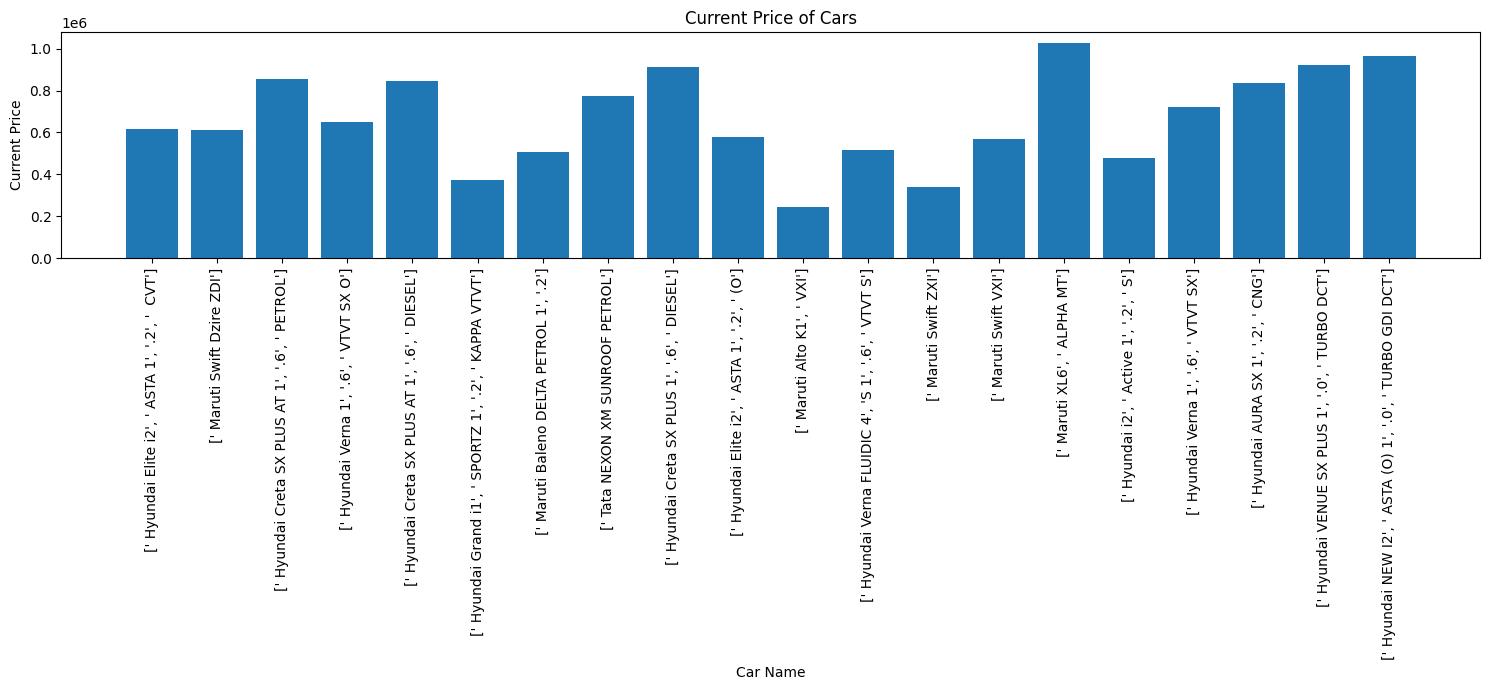

In [ ]:
# Create the Chart Minimum Current_Price to Maximum Current_Price

plt.figure(figsize=(15,7))
plt.bar(df_new['Cars_Name'].astype(str), df_new['Current_Price'])
plt.xlabel('Car Name')
plt.ylabel('Current Price')
plt.title('Current Price of Cars')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


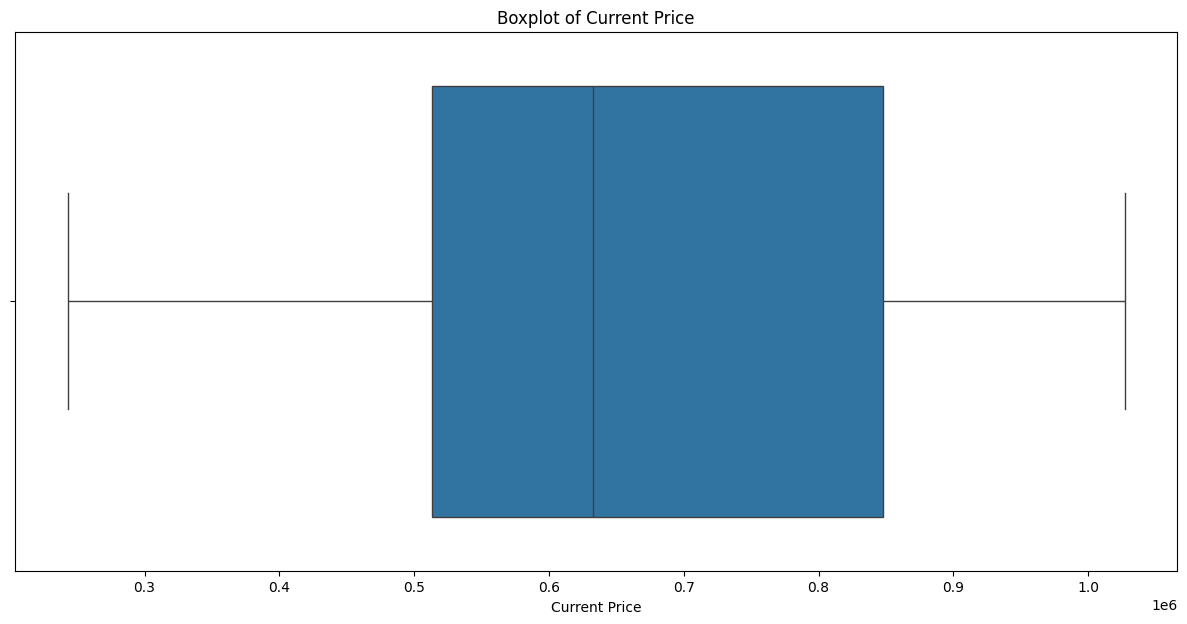

In [ ]:
# Assuming 'df_new' is your DataFrame and you want to create a boxplot for 'Current_Price'

plt.figure(figsize=(15,7))  # Adjust figure size if needed
sns.boxplot(x='Current_Price', data=df_new)
plt.title('Boxplot of Current Price')
plt.xlabel('Current Price')
plt.show()


<ipython-input-41-867411dfd44a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[col] = df_new[col].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)


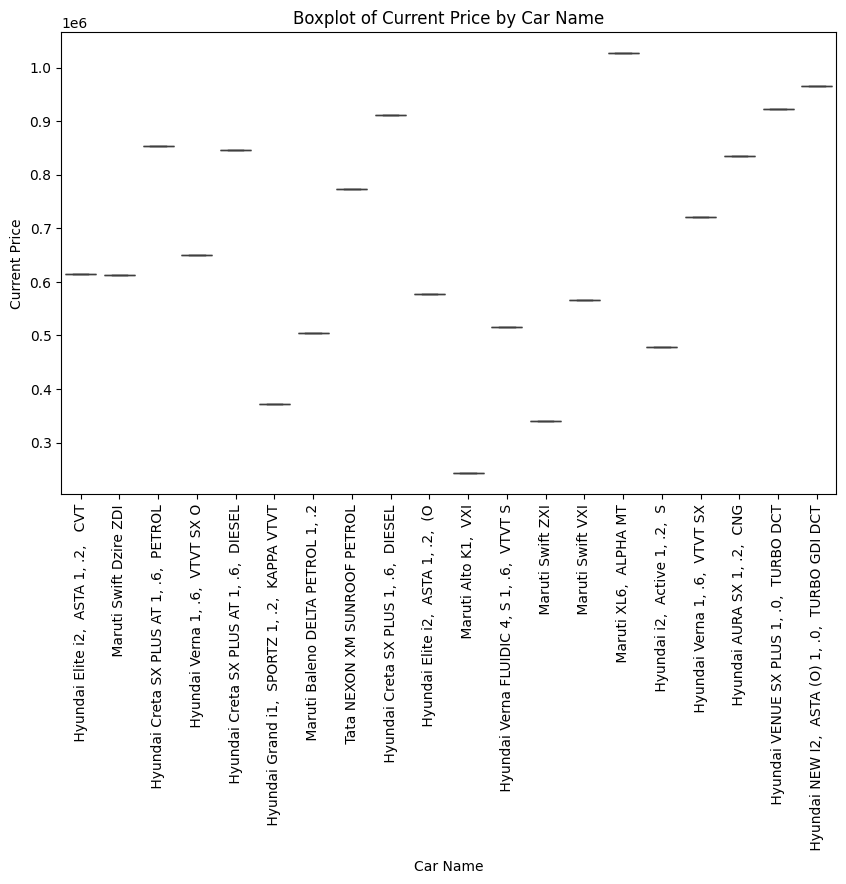

In [ ]:
# Convert list elements to strings in relevant columns
for col in ['Cars_Name', 'Manufacture_Date', 'Milage_Covered', 'Engine_Type', 'Current_Price',
            'Actual_Price', 'Discount', 'EMI', 'Used', 'Features','Specification', 'Test_Drive']:
    df_new[col] = df_new[col].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cars_Name', y='Current_Price', data=df_new)
plt.xticks(rotation=90)
plt.title('Boxplot of Current Price by Car Name')
plt.xlabel('Car Name')
plt.ylabel('Current Price')
plt.show()

<ipython-input-42-876ee85f6bad>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new.Current_Price)


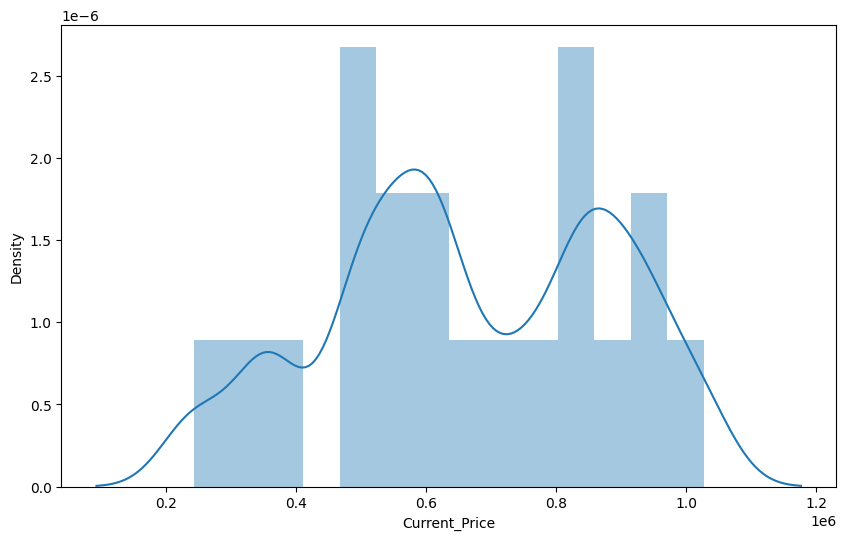

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(df_new.Current_Price)
plt.show()

<ipython-input-43-eef8569b70a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Actual_Price'] = df_new['Actual_Price'].astype(str)
<ipython-input-43-eef8569b70a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Current_Price'] = df_new['Current_Price'].astype(str)


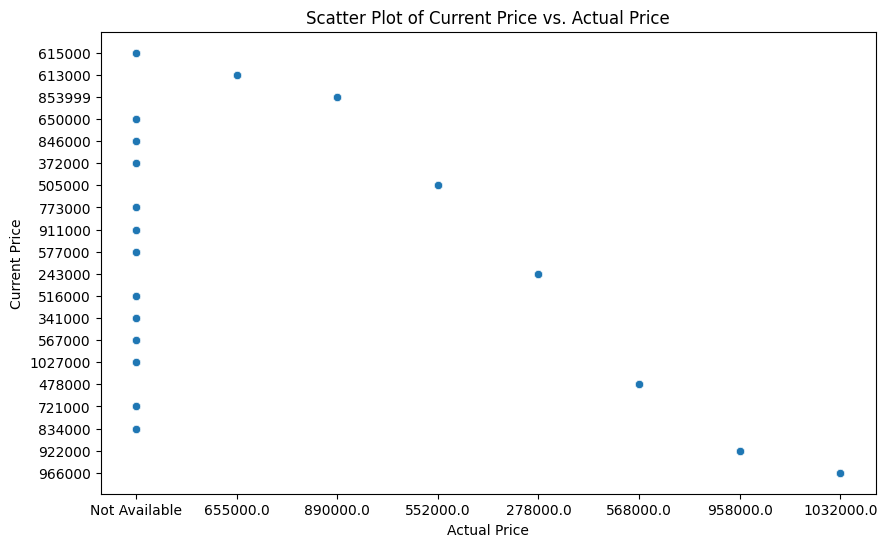

In [ ]:
# Convert 'Actual_Price' and 'Current_Price' columns to string type
df_new['Actual_Price'] = df_new['Actual_Price'].astype(str)
df_new['Current_Price'] = df_new['Current_Price'].astype(str)

# Scatter plot of Current Price vs. Actual Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual_Price', y='Current_Price', data=df_new)
plt.title('Scatter Plot of Current Price vs. Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Current Price')
plt.show()

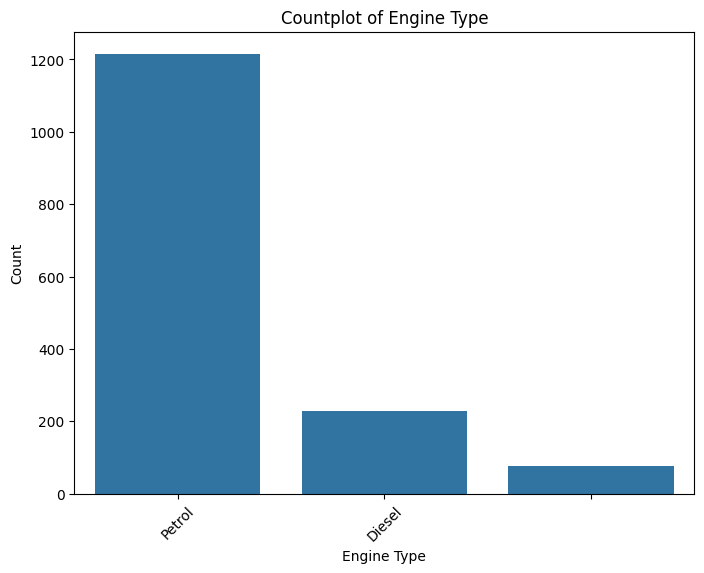

In [ ]:
# Countplot of Engine Type
plt.figure(figsize=(8, 6))
sns.countplot(x='Engine_Type', data=df_new)
plt.title('Countplot of Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-45-8720a941bdce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Discount'] = pd.to_numeric(df_new['Discount'], errors='coerce')


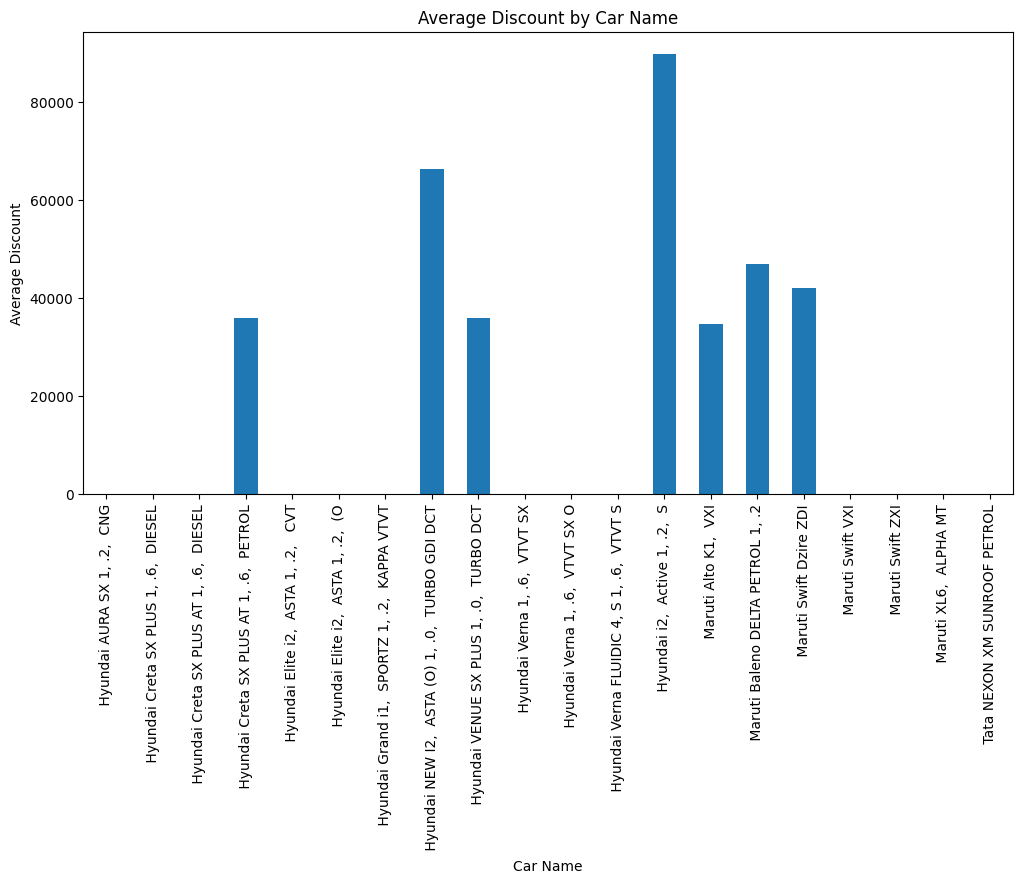

In [ ]:
# Convert 'Discount' column to numeric, handling non-numeric values
df_new['Discount'] = pd.to_numeric(df_new['Discount'], errors='coerce')

# Bar plot of Average Discount by Car Name
plt.figure(figsize=(12, 6))
df_new.groupby('Cars_Name')['Discount'].mean().plot(kind='bar')
plt.title('Average Discount by Car Name')
plt.xlabel('Car Name')
plt.ylabel('Average Discount')
plt.xticks(rotation=90)
plt.show()

#**CONCLUSION**


**Price Comparison:**

**Tata:** Generally offers competitive prices for used cars. Models like Tata Nexon and Tata Tiago are popular and often found at reasonable rates.

**Maruti:** Known for affordability and value for money. Used models like Maruti Swift and Maruti Alto usually have lower prices compared to competitors.

**Hyundai:** Offers a balance between cost and features. Popular models like Hyundai i20 and Hyundai Creta might be slightly higher priced due to their features and brand value.

**Mileage and Age:**

**Tata:** Mileage tends to be moderate, with newer models showing better efficiency. Older Tata cars might have higher mileage due to their robust build.

**Maruti:** Often shows higher mileage on older models but is generally fuel-efficient. Many Maruti cars retain good condition even after several years.

**Hyundai:** Typically exhibits low to moderate mileage with good fuel efficiency. Hyundai cars are known for their durability and lower maintenance costs.

**Availability and Variety:**

**Tata:** Good variety available, especially for recent models. Availability might be moderate for older or less popular models.

**Maruti:** Wide availability across different models and years. Maruti has a strong presence in the used car market.

**Hyundai:** Decent variety with a focus on popular models. Availability is generally good, with a range of options for different budgets.



**When considering a used car in Mumbai from Tata, Maruti, or Hyundai via Car24, Maruti often emerges as the most economical option with widespread availability and low maintenance costs. Tata offers robust and safe vehicles, suitable for those prioritizing build quality, while Hyundai provides a balanced choice with modern features and comfort. The final decision should be based on individual preferences for budget, required features, and long-term maintenance considerations.**